In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.activations import relu,leaky_relu,elu, sigmoid, softmax, linear


In [21]:
data = pd.read_csv('/home/ahmed/Ai/Neural-Networks-tutorial/data/Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
X = data.drop(columns=["RowNumber", "CustomerId", "Exited", 'Surname'])
Y = data["Exited"]


## Preparing data

In [25]:
cat = ["Geography", "Gender"]

X = pd.get_dummies(X, columns=cat, drop_first=True)
for i in X.columns:
    X[i] = X[i].astype(np.float32)

In [26]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021887,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.578736,-0.573809,0.912419
9996,-1.391939,-0.373958,1.724463,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.578736,-0.573809,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.578736,-0.573809,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022607,0.807737,0.646092,-1.030670,-0.125231,1.727904,-0.573809,0.912419


In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## First simple Neural Network

In [94]:
model = Sequential(
    [
        Dense(6, activation=relu,kernel_initializer='he_uniform' ,input_shape=(11,)),
        Dense(6, activation=relu, kernel_initializer='he_uniform'),
        Dense(1, activation=sigmoid, kernel_initializer='glorot_uniform')
    ]
)
model.compile(optimizer=SGD(learning_rate=0.01), loss=BinaryCrossentropy(), metrics=["accuracy"])

In [95]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.3)
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7475 - loss: 0.5967 - val_accuracy: 0.7763 - val_loss: 0.5579
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7886 - loss: 0.5221 - val_accuracy: 0.7887 - val_loss: 0.5222
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7879 - loss: 0.5054 - val_accuracy: 0.7925 - val_loss: 0.5027
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7960 - loss: 0.4693 - val_accuracy: 0.7929 - val_loss: 0.4901
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7984 - loss: 0.4597 - val_accuracy: 0.7929 - val_loss: 0.4816
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7994 - loss: 0.4662 - val_accuracy: 0.7933 - val_loss: 0.4759
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8001 - loss: 0.4507 - val_accuracy: 0.7937 - val_loss: 0.4713
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7983 - loss: 0

In [96]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8527 - loss: 0.3523
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8567 - loss: 0.3458


([0.3511482775211334, 0.8579999804496765],
 [0.34993311762809753, 0.8544999957084656])

In [45]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
history.history.keys(), max(history.history['accuracy']), min(history.history['loss'])

(dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss']),
 0.8687499761581421,
 0.32230016589164734)

<Axes: >

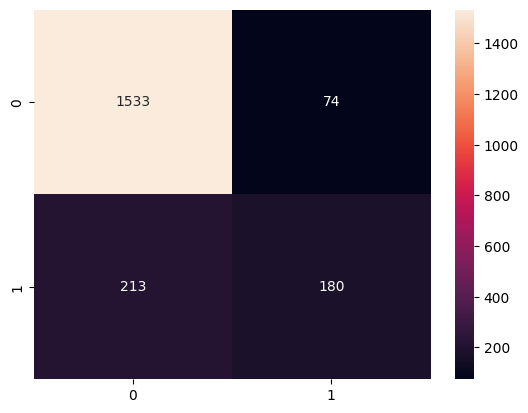

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## improve neural network

In [143]:
model = Sequential(
    [
        Dense(10, activation=relu, kernel_initializer="he_normal", input_shape=(11,)),
        Dropout(0.3),
        Dense(20, activation=relu, kernel_initializer="he_normal"),
        Dropout(0.4),
        Dense(15, activation=relu, kernel_initializer="he_normal"),
        Dropout(0.2),
        Dense(1, activation=linear, kernel_initializer="glorot_uniform"),
    ]
)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(from_logits=True), metrics=["accuracy"])


/home/ahmed/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
history =model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6652 - loss: 0.8476 - val_accuracy: 0.7887 - val_loss: 0.5323
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7672 - loss: 0.6223 - val_accuracy: 0.7887 - val_loss: 0.5066
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8007 - loss: 0.5427 - val_accuracy: 0.7887 - val_loss: 0.4995
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7905 - loss: 0.5320 - val_accuracy: 0.7887 - val_loss: 0.4931
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8005 - loss: 0.5126 - val_accuracy: 0.7887 - val_loss: 0.4845
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8036 - loss: 0.4895 - val_accuracy: 0.7887 - val_loss: 0.4759
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8068 - loss: 0.4890 - val_accuracy: 0.7887 - val_loss: 0.4646
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8007 - loss: 0.4

In [145]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,015 (7.88 KB)

 Trainable params: 671 (2.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,344 (5.25 KB)

In [149]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)
logist = model(x_test)
y_pred = sigmoid(logist)
y_pred = np.where(y_pred > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8398 - loss: 0.3560
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8331 - loss: 0.3500


<Axes: >

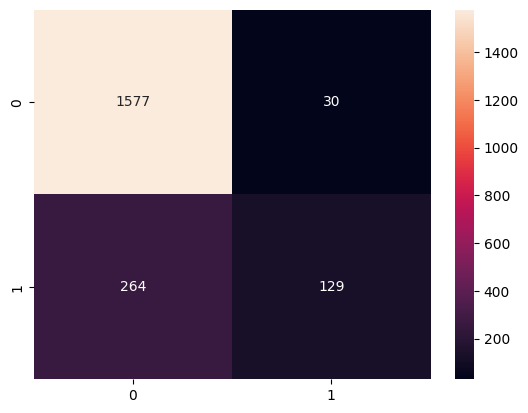

In [150]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')